In [13]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [14]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [15]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
#PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
#PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [16]:
INSTITUTION_ID = "ins_109508"

In [17]:
api_key = 'tjhwakjgfhkasjdhfsajdflsj$$$'
api_request = 'https://www.plaid.com/api/'

url = api_request + api_key

### 2. Generate a public token

In [18]:
# YOUR CODE HERE

create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

### 3. Exchange the public token for an access token

In [19]:
# YOUR CODE HERE
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [20]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'BEzrLExeBpiKWdVdxLDPfKJ8XqjwZJfwKzQBp',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '34eQn4glE3TmwD7DJN3kuM41l7adN4sq1mBAr',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'x13ED1Vb8aCjoGdGpXZ4sV347A5Qr3tnGyq1w',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [99]:
# YOUR CODE HERE

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transaction_response = client.Transactions.get(access_token,start_date,end_date)

print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "BEzrLExeBpiKWdVdxLDPfKJ8XqjwZJfwKzQBp",
        "account_owner": null,
        "amount": 89.4,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-02-11",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "SparkFun",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
     

### 2. Print the categories for each transaction

In [100]:
# YOUR CODE HERE
'''
for transactions in transactions_response['transactions']:
    if transactions['name'] != "":
        print(json.dumps(transaction['name'], indent=4, sort_keys=True))
'''

#print(transaction_response[0]['name'])

for transactions in transaction_response['transactions']:
    if transactions['name'] != "":
        print(json.dumps(transactions['category'][0], indent=4, sort_keys=True))

"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [101]:
# YOUR CODE HERE
transactions_df = pd.DataFrame()

date = []
name = []
amount = []
category = []

for transactions in transaction_response['transactions']:
    date.append(transactions['date'])
    name.append(transactions['name'])
    amount.append(transactions['amount'])
    category.append(transactions['category'][0])

transactions_df['Date'] = date
transactions_df['Name'] = name
transactions_df['Amount'] = amount
transactions_df['Category'] = category

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [102]:
# YOUR CODE HERE
print(type(transactions_df['Date'][0]))
print(type(transactions_df['Name'][0]))
print(type(transactions_df['Amount'][0]))
print(type(transactions_df['Category'][0]))
print("\n")
transactions_df.info()
print("\n")
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])
print(type(transactions_df['Date'][0]))

<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      49 non-null     object 
 1   Name      49 non-null     object 
 2   Amount    49 non-null     float64
 3   Category  49 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.7+ KB


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [103]:
transactions_df.sort_values(by='Date')

,Date,Name,Amount,Category
48,2019-11-13,SparkFun,89.40,Food and Drink
47,2019-11-14,Starbucks,4.33,Food and Drink
46,2019-11-14,McDonald's,12.00,Food and Drink
45,2019-11-15,United Airlines,-500.00,Travel
44,2019-11-15,Touchstone Climbing,78.50,Recreation
43,2019-11-16,CD DEPOSIT .INITIAL.,1000.00,Transfer
42,2019-11-16,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
41,2019-11-17,Uber,5.40,Travel
40,2019-11-17,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
39,2019-11-26,Madison Bicycle Shop,500.00,Shops


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [117]:
# YOUR CODE HERE

income = transactions_df.groupby('Category', sort=False)['Amount'].sum()
gross_income_p_quarter = income[1]
monthly_income = gross_income_p_quarter / 3
projected_income_p_year = gross_income_p_quarter * 4
previous_year_gross_income = round(projected_income_p_year / .72, 2)

print(f"The previous year's gross income was ${previous_year_gross_income}")
print(f"The Current Monthly Income is ${monthly_income}")
print(f"This year's projected yearly net income is ${projected_income_p_year}")

The previous year's gross income was $114096.33
The Current Monthly Income is $6845.78
This year's projected yearly net income is $82149.36


In [105]:
gi = transactions_df.groupby('Category', sort=False)['Amount'].sum()
gi

Category
Food and Drink     3406.59
Transfer          20537.34
Travel               35.19
Payment            6310.50
Shops              1500.00
Recreation          235.50
Name: Amount, dtype: float64

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [107]:
# YOUR CODE HERE

g = transactions_df.groupby('Category',sort=False)['Amount'].sum()
g_df = pd.DataFrame(g)
g_df

,Amount
Category,
Food and Drink,3406.59
Transfer,20537.34
Travel,35.19
Payment,6310.50
Shops,1500.00
Recreation,235.50


### Calculate the expenses per month

In [108]:
# YOUR CODE HERE
total_expenses = round(g_df['Amount'].sum() - g_df['Amount'][1], 2)
total_expenses

11487.78

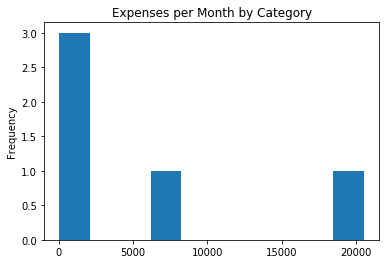

In [109]:
# Generate a bar chart with the number of transactions for each category
# Plot grouped total expenses per month

plot_title = "Expenses per Month by Category"
expenses = g_df['Amount'][1:]
expenses.plot(kind='hist', title = plot_title)